# Exploratory Data Analysis

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scikitplot as skplt

In [2]:
df = pd.read_parquet('../datasets/var_finacieras.parquet', engine='fastparquet')

In [3]:
df.head()

,DIM_CUENTAS,CUPONES_3M,MET_PESOS_SALDOS_VTO,MET_ZETA_SALDOS_VTO,MET_DOLAR_SALDOS_VTO,MET_LIMITE_SM,VALOR_DOLAR_INICIO_INACTIVIDAD,RENTABILIDAD,MESESINACTIVIDAD,CANTADICIONALES,...,vl_deuda_sistema,nu_entidades_TC,nu_entidades,cd_entidad_principal,vl_deuda_sistema_dolarizada,INGRESO_ESTIMADO,ingreso_estimado_dolarizado,deuda_concentrada,max_atraso_new,ratio_ingreso_deuda
0,151,9,408.83,0.0,0.0,16000.0,43.0,5776.3918,18,1,...,496.0,1.0,2.0,285.0,6.358974,NaN,NaN,1,0,NaN
1,152,0,539.21,0.0,0.0,69000.0,78.0,3576.0000,7,0,...,136.0,0.0,2.0,285.0,1.743590,69584.0,892.102564,1,0,0.001954
2,182,2,-246.92,0.0,0.0,15000.0,63.0,523.4380,10,0,...,502.0,0.0,3.0,11.0,6.435897,NaN,NaN,1,0,NaN
3,199,0,288.18,0.0,0.0,12500.0,63.0,9170.5468,16,1,...,6.0,0.0,1.0,285.0,0.076923,NaN,NaN,1,0,NaN
4,212,2,600.29,0.0,0.0,19000.0,74.3,2384.8767,16,0,...,5.0,1.0,1.0,70147.0,0.064103,21263.0,272.602564,1,0,0.000235


In [4]:
df.shape

(349732, 21)

In [5]:
df.duplicated().sum()

1165

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(348567, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348567 entries, 0 to 349731
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DIM_CUENTAS                     348567 non-null  int32  
 1   CUPONES_3M                      348567 non-null  int32  
 2   MET_PESOS_SALDOS_VTO            348567 non-null  float64
 3   MET_ZETA_SALDOS_VTO             348567 non-null  float64
 4   MET_DOLAR_SALDOS_VTO            348567 non-null  float64
 5   MET_LIMITE_SM                   348567 non-null  float64
 6   VALOR_DOLAR_INICIO_INACTIVIDAD  348567 non-null  float64
 7   RENTABILIDAD                    348567 non-null  float64
 8   MESESINACTIVIDAD                348567 non-null  object 
 9   CANTADICIONALES                 348567 non-null  int32  
 10  ANTIGUEDAD                      348567 non-null  int32  
 11  vl_deuda_sistema                241901 non-null  float64
 12  nu_entidades_TC 

In [9]:
df.isnull().sum()

DIM_CUENTAS                            0
CUPONES_3M                             0
MET_PESOS_SALDOS_VTO                   0
MET_ZETA_SALDOS_VTO                    0
MET_DOLAR_SALDOS_VTO                   0
MET_LIMITE_SM                          0
VALOR_DOLAR_INICIO_INACTIVIDAD         0
RENTABILIDAD                           0
MESESINACTIVIDAD                       0
CANTADICIONALES                        0
ANTIGUEDAD                             0
vl_deuda_sistema                  106666
nu_entidades_TC                   106666
nu_entidades                      106666
cd_entidad_principal              123599
vl_deuda_sistema_dolarizada       106666
INGRESO_ESTIMADO                  185153
ingreso_estimado_dolarizado       185153
deuda_concentrada                      0
max_atraso_new                         0
ratio_ingreso_deuda               233845
dtype: int64

In [10]:
df.columns = df.columns.str.lower()

In [11]:
lista_columnas = df.columns.to_list()

In [12]:
lista_columnas

['dim_cuentas',
 'cupones_3m',
 'met_pesos_saldos_vto',
 'met_zeta_saldos_vto',
 'met_dolar_saldos_vto',
 'met_limite_sm',
 'valor_dolar_inicio_inactividad',
 'rentabilidad',
 'mesesinactividad',
 'cantadicionales',
 'antiguedad',
 'vl_deuda_sistema',
 'nu_entidades_tc',
 'nu_entidades',
 'cd_entidad_principal',
 'vl_deuda_sistema_dolarizada',
 'ingreso_estimado',
 'ingreso_estimado_dolarizado',
 'deuda_concentrada',
 'max_atraso_new',
 'ratio_ingreso_deuda']

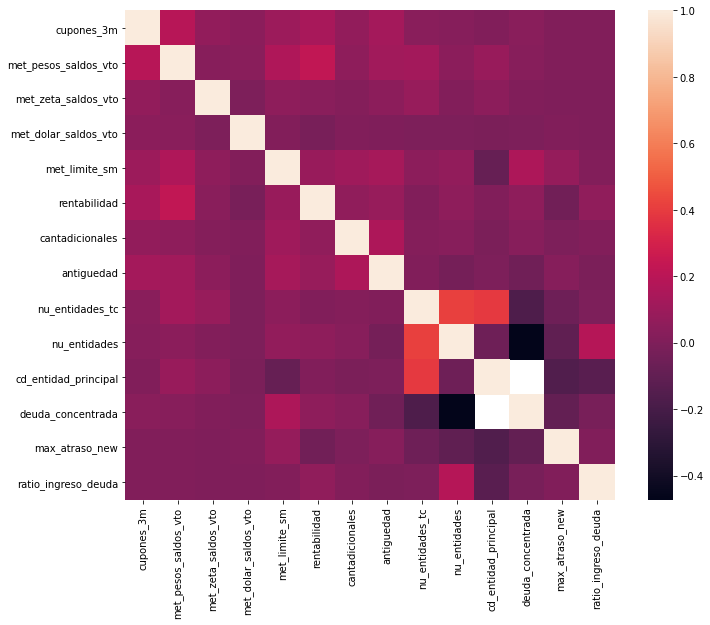

In [16]:
corrmat = df.drop(['dim_cuentas', 'valor_dolar_inicio_inactividad', 'ingreso_estimado', 'vl_deuda_sistema_dolarizada',
                  'vl_deuda_sistema', 'ingreso_estimado_dolarizado' ], axis = 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [17]:
df.reset_index(drop=True, inplace = True)

In [18]:
def escala_datos(method,df):
    if method == 'minmax':
        minmax = MinMaxScaler()
        df_to_scale = df.drop(['dim_cuentas'], axis = 1)
        data_minmax = minmax.fit_transform(df_to_scale)
        scaled_df = pd.DataFrame(data_minmax, columns = df_to_scale.columns.to_list())
        scaled_df.insert(0, 'dim_cuentas', df['dim_cuentas'].astype(int))
    
    elif method == 'standard':
        sc = StandardScaler()
        df_to_scale = df.drop(['dim_cuentas'], axis = 1)
        data_scaled = sc.fit_transform(df_to_scale)
        scaled_df = pd.DataFrame(data_scaled, columns = df_to_scale.columns.to_list())
        scaled_df.insert(0, 'dim_cuentas', df['dim_cuentas'].astype(int))
    
    else:
        return 'No se selecciono metodo. Puede usar minmax o standard'
    
    return scaled_df, sc


In [21]:
scaled_df, sc = escala_datos('standard',df)

In [23]:
scaled_df.head()

,dim_cuentas,cupones_3m,met_pesos_saldos_vto,met_zeta_saldos_vto,met_dolar_saldos_vto,met_limite_sm,valor_dolar_inicio_inactividad,rentabilidad,mesesinactividad,cantadicionales,...,vl_deuda_sistema,nu_entidades_tc,nu_entidades,cd_entidad_principal,vl_deuda_sistema_dolarizada,ingreso_estimado,ingreso_estimado_dolarizado,deuda_concentrada,max_atraso_new,ratio_ingreso_deuda
0,151,2.108315,-0.346457,-0.141756,-0.036918,-0.047284,-1.227675,0.729683,0.897918,1.493512,...,0.828371,1.596740,0.206826,-0.443561,0.828371,NaN,NaN,0.74122,0.244427,NaN
1,152,-0.626769,-0.294806,-0.141756,-0.036918,3.682067,0.832238,0.001127,-0.258783,-0.498944,...,0.008041,-0.502815,0.206826,-0.443561,0.008041,1.753239,1.753239,0.74122,0.244427,-0.132274
2,182,-0.018972,-0.606239,-0.141756,-0.036918,-0.117649,-0.050581,-1.009584,0.056681,-0.498944,...,0.842043,-0.502815,1.116455,-0.454867,0.842043,NaN,NaN,0.74122,0.244427,NaN
3,199,-0.626769,-0.394254,-0.141756,-0.036918,-0.293562,-0.050581,1.853496,0.687609,1.493512,...,-0.288189,-0.502815,-0.702803,-0.443561,-0.288189,NaN,NaN,0.74122,0.244427,NaN
4,212,-0.018972,-0.270609,-0.141756,-0.036918,0.163811,0.614476,-0.393257,0.687609,-0.498944,...,-0.290468,1.596740,-0.702803,2.439050,-0.290468,-0.706406,-0.706406,0.74122,0.244427,-0.341270


In [24]:
scaled_df.describe() #standarScaler genera que el valor medio de cada variable sea 0 y la desv standar sea 1
                     #Es conveniente usarlo previo a un PCA o una clusterización

,dim_cuentas,cupones_3m,met_pesos_saldos_vto,met_zeta_saldos_vto,met_dolar_saldos_vto,met_limite_sm,valor_dolar_inicio_inactividad,rentabilidad,mesesinactividad,cantadicionales,...,vl_deuda_sistema,nu_entidades_tc,nu_entidades,cd_entidad_principal,vl_deuda_sistema_dolarizada,ingreso_estimado,ingreso_estimado_dolarizado,deuda_concentrada,max_atraso_new,ratio_ingreso_deuda
count,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,3.485670e+05,...,2.419010e+05,2.419010e+05,2.419010e+05,2.249680e+05,2.419010e+05,1.634140e+05,1.634140e+05,3.485670e+05,3.485670e+05,1.147220e+05
mean,7.715809e+08,-5.218479e-18,-5.870788e-18,1.304620e-18,-1.320927e-17,1.956929e-18,-8.871413e-16,-1.076311e-16,4.566169e-17,4.533553e-17,...,-3.090070e-17,-1.380544e-17,5.522178e-18,4.535487e-17,2.440920e-17,1.699243e-16,-2.285369e-16,1.565544e-17,1.304620e-18,1.121662e-16
std,5.557393e+08,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000003e+00,1.000003e+00,1.000001e+00,1.000001e+00,1.000004e+00
min,1.510000e+02,-6.267687e-01,-5.472192e+01,-6.992648e+00,-1.826095e+01,-1.173126e+00,-2.578389e+00,-4.464395e+00,-9.948653e-01,-4.989443e-01,...,-3.018613e-01,-5.028149e-01,-7.028031e-01,-4.550321e-01,-3.018613e-01,-1.737175e+00,-1.737175e+00,-1.349127e+00,-4.091195e+00,-3.698538e-01
25%,2.928625e+06,-6.267687e-01,-4.418962e-01,-1.417563e-01,-3.691750e-02,-7.298259e-01,-4.037094e-01,-5.044441e-01,-7.845561e-01,-4.989443e-01,...,-2.654022e-01,-5.028149e-01,-7.028031e-01,-4.547020e-01,-2.654022e-01,-6.343790e-01,-6.343790e-01,-1.349127e+00,2.444274e-01,-3.167276e-01
50%,1.216607e+09,-3.228705e-01,-3.153826e-01,-1.417563e-01,-3.691750e-02,-2.935621e-01,2.584055e-01,1.127276e-03,-2.587830e-01,-4.989443e-01,...,-1.879266e-01,-5.028149e-01,-7.028031e-01,-4.523501e-01,-1.879266e-01,-2.396834e-01,-2.396834e-01,7.412200e-01,2.444274e-01,-2.060038e-01
75%,1.251719e+09,2.849259e-01,5.748487e-02,-1.417563e-01,-3.691750e-02,3.749066e-01,8.322384e-01,5.875957e-02,5.824540e-01,-4.989443e-01,...,-1.474579e-02,-5.028149e-01,2.068260e-01,-4.420760e-01,-1.474579e-02,3.061409e-01,3.061409e-01,7.412200e-01,2.444274e-01,2.373236e-02
max,1.252252e+09,1.154623e+02,5.614108e+01,1.206929e+02,1.276674e+02,1.993641e+01,9.646614e-01,4.208200e+01,1.341132e+01,1.145579e+01,...,1.461020e+02,7.895406e+00,1.385126e+01,2.540305e+00,1.461020e+02,4.911341e+01,4.911341e+01,7.412200e-01,2.444274e-01,1.541415e+02


In [ ]:
pca = PCA(0.9)
principalComponents = pca.fit_transform(scaled_df.drop(['dim_cuentas', 'valor_dolar_inicio_inactividad', 'ingreso_estimado', 'vl_deuda_sistema_dolarizada',
                  'vl_deuda_sistema', 'ingreso_estimado_dolarizado' ], axis = 1))

In [39]:
principalDf = pd.DataFrame(data = principalComponents)

In [40]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.106931,-0.965887,4.972362,9.771447,-0.415323,-0.839649,8.351285,-1.559240,0.006289,0.152689
1,2.848894,0.800677,2.201687,5.644171,-0.204565,-0.709129,3.154302,-1.371291,-1.233716,-1.504303
2,0.231602,0.755985,4.148629,6.539319,0.403245,-2.809347,2.457151,-0.114450,-0.178259,-0.589578
3,0.941921,-1.147947,3.361555,7.385372,-0.442351,0.126779,1.405329,0.333741,0.531991,0.207826
4,2.191709,-1.702354,6.409281,7.091564,1.417740,-6.346691,1.699184,1.221514,0.518093,-0.048367


In [41]:
pca.explained_variance_ratio_ #cuanta varianza toma cada componente principal. Cuanto mas grande es la suma, mejor

array([0.21746612, 0.12972137, 0.09220004, 0.08035626, 0.07704197,
       0.07538556, 0.0710379 , 0.06876416, 0.06292793, 0.0534249 ])

In [42]:
pca.explained_variance_ratio_ .sum()

0.9283262262930334

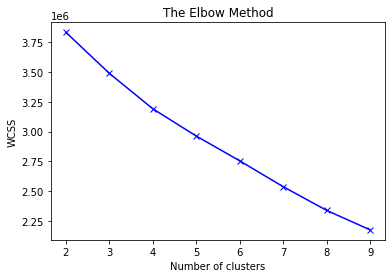

In [24]:
#ELBOW with data_train without scaling
clusters = range(2, 10)
kmeanslist = []
WCSS = [] #Within-Cluster Sum-Squares metric


for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(scaled_df.drop(['dim_cuentas'], axis = 1))
    WCSS.append(kmeans.inertia_)
    kmeanslist.append(kmeans)

    
plt.plot(clusters, WCSS, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

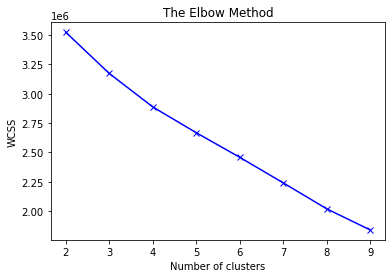

In [43]:
#ELBOW with data_train without scaling
clusters = range(2, 10)
kmeanslist = []
WCSS = [] #Within-Cluster Sum-Squares metric


for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(principalDf)
    WCSS.append(kmeans.inertia_)
    kmeanslist.append(kmeans)

    
plt.plot(clusters, WCSS, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

2_clusters


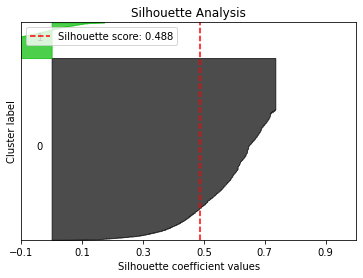

El SS para 2 clusters es de 0.488
3_clusters


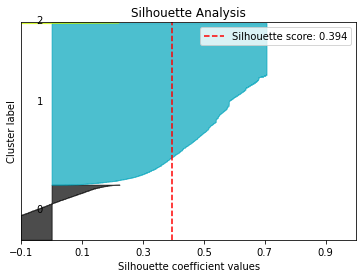

El SS para 3 clusters es de 0.394
4_clusters


KeyboardInterrupt: 

In [44]:
clusters = range(2, 5)
SS = [] #Silhouette metric list
results = {}

for cluster in clusters:
    print("{}_clusters".format(cluster))
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(principalDf)
    cluster_labels = kmeans.fit_predict(principalDf)
    results[cluster] = cluster_labels
    score = silhouette_score(principalDf, labels = cluster_labels, metric='euclidean')
    SS.append(score)
    skplt.metrics.plot_silhouette(principalDf, cluster_labels)
    plt.show()
    print('El SS para {} clusters es de {:.3f}'.format(cluster, score))

In [ ]:
plt.plot(clusters, SS, 'bx-')
plt.title('Silhouette Score for all data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
clusters_clients = pd.DataFrame({'client_id' : df.client_id,**{'{}_clusters'.format(k) : v for k,v in results.items()}})
clusters_clients.to_csv('clustering_results.csv', index = False)   